In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
pip install plotly


In [ ]:
# Load dataset
import pandas as pd

df = pd.read_csv('./IMDB-Dataset.csv')

# Remove duplicate rows
df = df.drop_duplicates()


***
Xoá thẻ HTML:
Dùng BeautifulSoup để loại bỏ thẻ HTML khỏi đoạn văn.

Mở rộng từ rút gọn (contractions):
Ví dụ: don't → do not, it's → it is.

Loại bỏ emoji:
Dùng biểu thức chính quy để xoá các ký tự cảm xúc, biểu tượng.

Chuẩn hóa dấu chấm:
Thêm khoảng trắng sau dấu . nếu bị thiếu.

Xoá URL:
Loại bỏ các đường link khỏi văn bản.

Xoá dấu câu và viết thường:
Chuyển toàn bộ chữ thành chữ thường và loại bỏ các dấu câu (.,!?...).

Lemmatization + Loại bỏ stopwords:

Lemmatization: Đưa từ về gốc (v.d. running → run).

Stopwords: Loại bỏ các từ phổ biến không mang nhiều ý nghĩa như the, is, in...

Cập nhật lại vào DataFrame:
Gán kết quả đã làm sạch vào cột review mới.
***


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Define stopwords chú ý ở đoạn này tuỳ thuộc có phải bài liên quan đến cảm xúc không vì nếu mình bỏ các từ no, not sẽ làm ảnh hưởng đến cảm xúc của câu.
stop = set(stopwords.words('english'))

# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data
def preprocess_text(text):
    wl = WordNetLemmatizer()

    # Removing HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Expanding chatwords and contractions
    text = expand_contractions(text)

    # Remove emojis
    emoji_clean = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE
    )
    text = emoji_clean.sub(r'', text)

    # Add space after full stop if missing
    text = re.sub(r'\.(?=\S)', '. ', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation and lowercase
    text = "".join([
        word.lower() for word in text if word not in string.punctuation
    ])

    # Lemmatize, remove stopwords and non-alpha words
    text = " ".join([
        wl.lemmatize(word) for word in text.split()
        if word not in stop and word.isalpha()
    ])

    return text

# Apply preprocessing to review column
df['review'] = df['review'].apply(preprocess_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


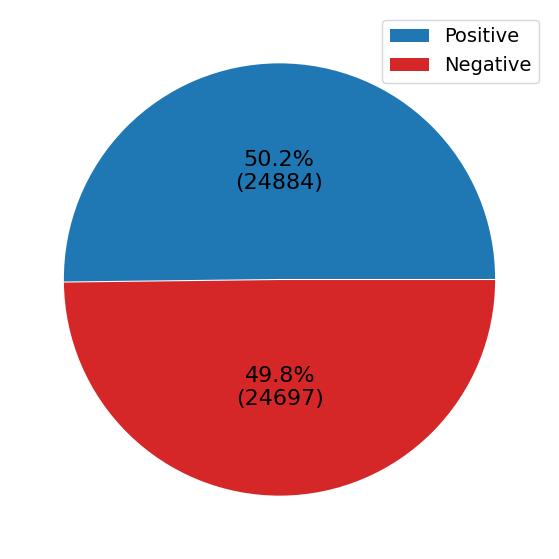

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Hàm tạo nhãn hiển thị phần trăm và số lượng
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Đếm số lượng sentiment 'positive' và 'negative'
freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]
labels = ['Positive', 'Negative']

# Tạo biểu đồ hình tròn
pie, ax = plt.subplots(figsize=[11, 7])
plt.pie(
    x=data,
    autopct=lambda pct: func(pct, data),
    explode=[0.0025] * 2,
    pctdistance=0.5,
    colors=[sns.color_palette()[0], 'tab:red'],
    textprops={'fontsize': 16}
)

# Thêm chú thích (legend)
plt.legend(labels, loc="best", prop={'size': 14})

# Lưu biểu đồ
pie.savefig("PieChart.png")

# Hiển thị biểu đồ
plt.show()


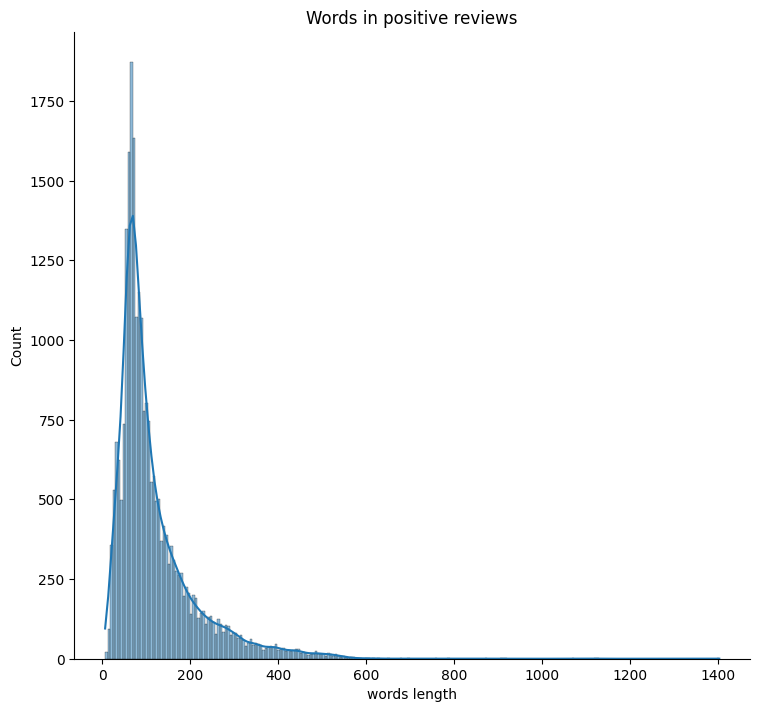

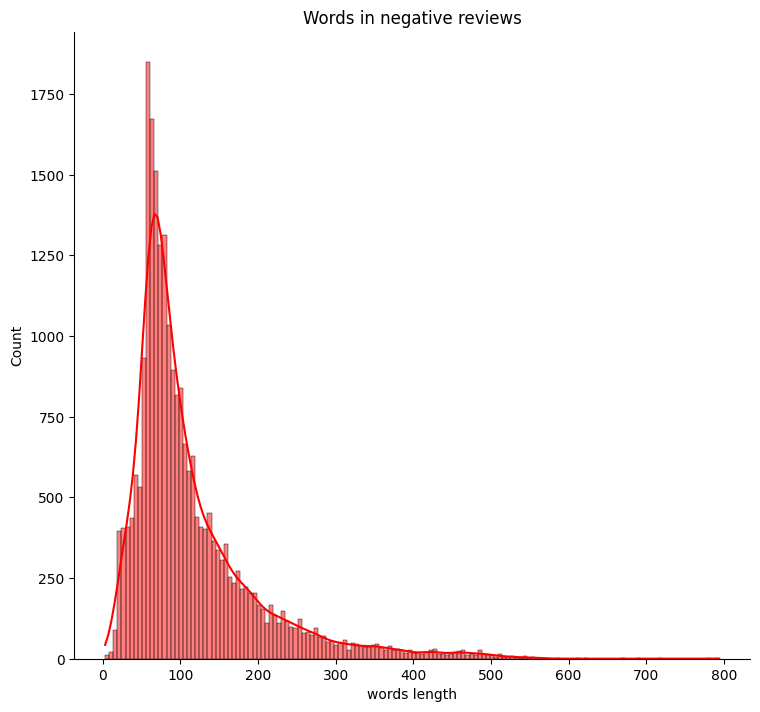

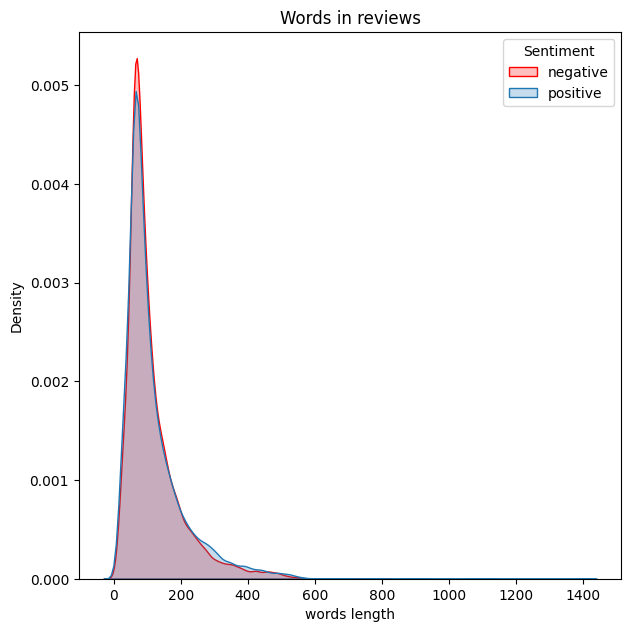

In [ ]:
# Tính độ dài (số từ) của mỗi review
words_len = df['review'].str.split().map(lambda x: len(x))

# Tạo bản sao của dataframe để không làm thay đổi bản gốc
df_temp = df.copy()
df_temp['words length'] = words_len

# Biểu đồ phân phối số từ trong các review tích cực
hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="words length",
    hue="sentiment",
    kde=True,
    height=7,
    aspect=1.1,
    legend=False
).set(title='Words in positive reviews')

plt.show()

# Biểu đồ phân phối số từ trong các review tiêu cực
hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="words length",
    hue="sentiment",
    kde=True,
    height=7,
    aspect=1.1,
    legend=False,
    palette=['red']
).set(title='Words in negative reviews')

plt.show()

# Biểu đồ KDE tổng hợp số từ cho cả hai loại sentiment
plt.figure(figsize=(7, 7.1))
kernel_distribution_number_words_plot = sns.kdeplot(
    data=df_temp,
    x="words length",
    hue="sentiment",
    fill=True,
    palette=[sns.color_palette()[0], 'red']
).set(title='Words in reviews')

plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Mã hóa nhãn sentiment (positive/negative) thành số 0/1
label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])

# Vector hóa văn bản bằng TF-IDF
x_data = df['review']

# Tách tập train và test
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tạo vectorizer với giới hạn số lượng đặc trưng là 10.000
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit trên dữ liệu huấn luyện (văn bản gốc, chưa được vector hóa)
tfidf_vectorizer.fit(x_train)

# Biến đổi văn bản thành vector TF-IDF
x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)


# ***Decision tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình cây quyết định (Decision Tree) (mình có thể thêm chỉ số max_depth = 5 , và các tham số khác để điều chỉnh độ chính xác)
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

# Huấn luyện mô hình trên dữ liệu huấn luyện đã TF-IDF hóa
dt_classifier.fit(x_train_encoded, y_train)

# Dự đoán trên tập kiểm tra
y_pred = dt_classifier.predict(x_test_encoded)

# Tính và in độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của Decision Tree: {accuracy:.4f}")


Độ chính xác của Decision Tree: 0.7150


# ***Random forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Random Forest, có thể thêm các tham số như n_estimator: số lượng cây trong rừng, max_depth:độ sâu max của mỗi cây, max_feature = 'sqrt', bootstrap = true: nghĩa là dữ liệu có thể lặp .
rf_classifier = RandomForestClassifier(random_state=42)

# Huấn luyện mô hình trên dữ liệu TF-IDF
rf_classifier.fit(x_train_encoded, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_classifier.predict(x_test_encoded)

# Tính và in độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của Random Forest: {accuracy:.4f}")


Độ chính xác của Random Forest: 0.8428


# ***Adaboost***: tập trung vào những lỗi sai để, mẫu nào sai sẽ được đánh trọng số cao hơn để mô hình tập trung vào việc xử lí những mẫu sai đó, còn mẫu đúng có thể giữ nguyên hoặc giảm tuỳ thuộc vào ý định của mình, ban đầu các trọng số được đánh là 1/N.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# 1. Khởi tạo mô hình AdaBoost với 100 cây cơ sở
adb_classifier = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)

# 2. Huấn luyện mô hình với dữ liệu TF-IDF hóa
adb_classifier.fit(x_train_encoded, y_train)

# 3. Dự đoán trên tập kiểm tra
y_pred = adb_classifier.predict(x_test_encoded)

# 4. Tính độ chính xác
accuracy_score(y_pred, y_test)


0.7659574468085106

# ***gradient boost***: tập trung vào việc cải thiện sự yếu kém của mẫu trước bằng gradient descent hãy nói cho dễ hiểu nghĩa là nó sử dụng đạo hàm của hàm loss để đi ngược lại hướng đạo hàm từ đó giảm tổng lỗi xuống mức thấp nhất, khi làm tới các bài này ở những dự án lớn mình cần tìm hiểu sâu hơn các tham số để cải thiện độ chính xác của các model.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# 1. Khởi tạo mô hình Gradient Boosting
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,
    random_state=42
)

# 2. Huấn luyện mô hình
gb_classifier.fit(x_train_encoded, y_train)

# 3. Dự đoán trên tập kiểm tra
y_pred = gb_classifier.predict(x_test_encoded)

# 4. Tính và in độ chính xác
accuracy_score(y_test, y_pred)


0.7955026721790864

# ***Xgboost***: thuật toán gần tương tự như gradient boost nhưng khác ở chỗ xgboost đạo hàm bậc 2 thay vì chỉ đạo hàm bậc 1 như gradient boost giúp tối ưu mô hình 1 các thông minh và nhanh chóng.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 1. Khởi tạo mô hình XGBoost với 100 cây
xgb_classifier = XGBClassifier(n_estimators=100)

# 2. Huấn luyện mô hình với dữ liệu TF-IDF hóa
xgb_classifier.fit(x_train_encoded, y_train)

# 3. Dự đoán
y_pred = xgb_classifier.predict(x_test_encoded)

# 4. Tính độ chính xác
accuracy_score(y_pred, y_test)


0.8456186346677422